In [ ]:
# RUN ONLY ONCE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import sys
import numpy as np
import pandas as pd
import librosa as lr
import librosa.display as lrd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Audio
import os
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#### Load BanglaSER Dataset

In [ ]:
dataset = '../Datasets/BanglaSER/'

files = []
emo = []

def getEmotion(i):
    if i == '01':
        return 'happy'
    elif i == '02':
        return 'sad'
    elif i == '03':
        return 'angry'
    elif i == '04':
        return 'surprise'
    elif i == '05':
        return 'neutral'
    else :
        return 'error'


for dirpath, dirnames, filenames in os.walk(dataset):
    for filename in filenames:
        files.append(os.path.join(dirpath, filename))
        x = filename.split('-')[2]
        emo.append(getEmotion(x))


# files
# emo

#### Load SUBESCO Dataset

In [ ]:
# dataset = '/content/drive/MyDrive/Datasets/SUBESCO'

# files = []
# emo = []

# for dirpath, dirnames, filenames in os.walk(dataset):
#     # print(dirnames, filenames)
#     for filename in filenames:
#         x = os.path.join(dirpath, filename)
#         files.append(x)
#         y = x.split('_')[-2].lower()
#         emo.append(y)

# files
# emo

#### Load TESS Dataset

In [ ]:
# dataset = '/content/drive/MyDrive/Datasets/tess'

# files = []
# emo = []

# for dirpath, dirnames, filenames in os.walk(dataset):
#     # print(dirnames, filenames)
#     for filename in filenames:
#         x = os.path.join(dirpath, filename)
#         files.append(x)
#         y = x.split('_')[-1].split('.')[0].lower()
#         emo.append(y)

#### ERD

In [8]:
d = pd.DataFrame()
d['sound'] = files
d['emotion'] = emo

d.sample(10)

,sound,emotion
1269,../Datasets/BanglaSER/Actor 30\03-01-04-02-01-...,surprise
22,../Datasets/BanglaSER/Actor 01\03-01-03-02-02-...,angry
89,../Datasets/BanglaSER/Actor 02\03-01-05-01-03-...,neutral
505,../Datasets/BanglaSER/Actor 12\03-01-03-02-01-...,angry
223,../Datasets/BanglaSER/Actor 05\03-01-05-01-03-...,neutral
1208,../Datasets/BanglaSER/Actor 29\03-01-01-01-01-...,happy
399,../Datasets/BanglaSER/Actor 09\03-01-05-01-02-...,neutral
388,../Datasets/BanglaSER/Actor 09\03-01-04-02-01-...,surprise
1462,../Datasets/BanglaSER/Actor 34\03-01-05-01-02-...,neutral
1035,../Datasets/BanglaSER/Actor 25\03-01-02-01-01-...,sad


<AxesSubplot:xlabel='emotion', ylabel='count'>

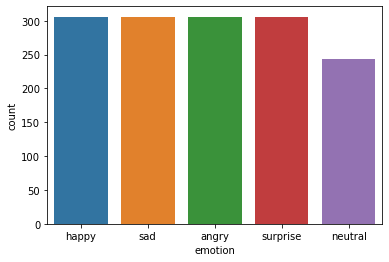

In [9]:
sb.countplot(x='emotion', data=d)

In [14]:
def waveplot(data, sr, title):
    plt.figure(figsize=(12, 4))
    plt.title(title)
    lrd.waveshow(data, sr=sr)
    plt.show()

def spectograph(data, sr, title):
    x = lr.stft(data)
    xdb = lr.amplitude_to_db(abs(x))
    plt.figure(figsize=(12, 4))
    plt.title(title)
    lrd.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

def getPath(EType):
    return np.array(d['sound'][d['emotion'] == EType])[0]

def getInfo(EType):
    path = getPath(EType)
    data, sr = lr.load(path)
    waveplot(data, sr, EType)
    spectograph(data, sr, EType)


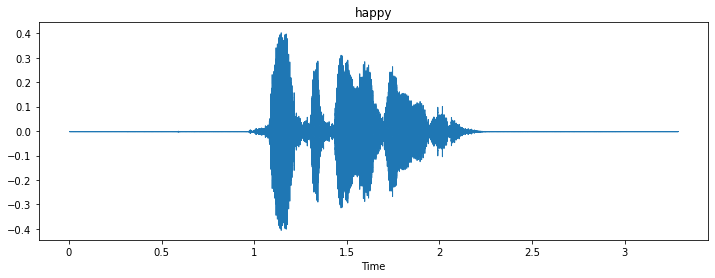

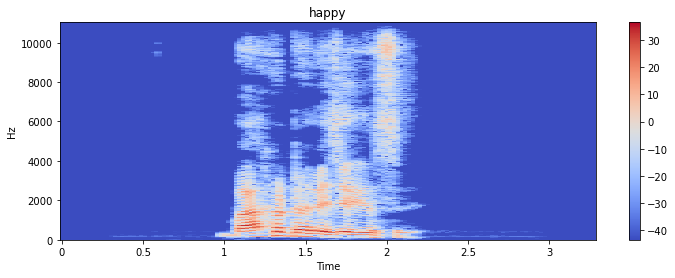

In [15]:
EType = 'happy'
getInfo(EType)
Audio(getPath(EType))

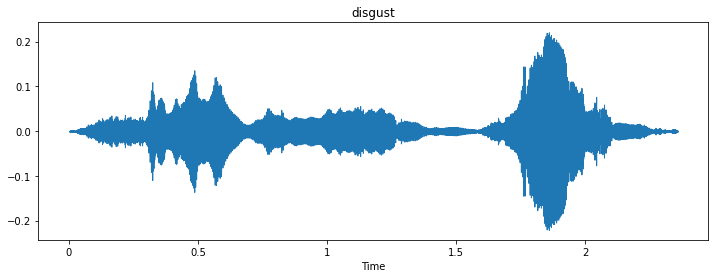

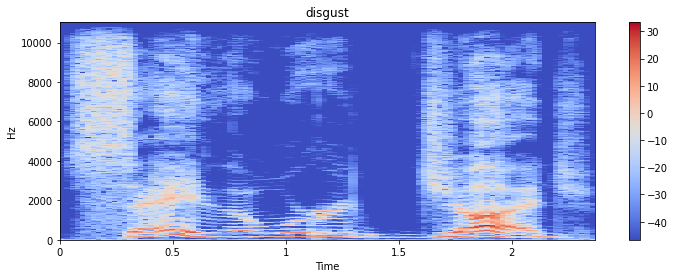

In [ ]:
EType = 'disgust'
getInfo(EType)
Audio(getPath(EType))

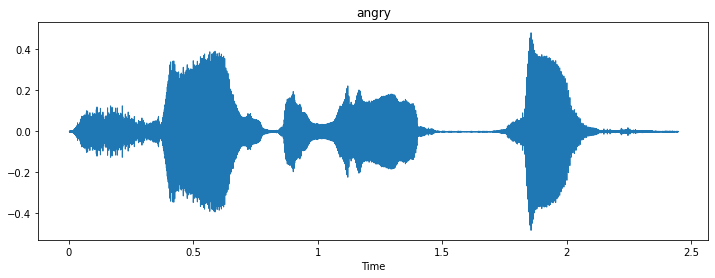

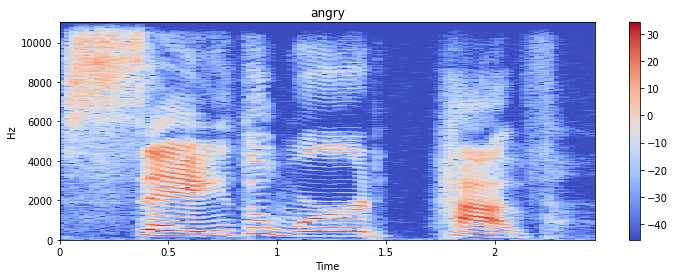

In [ ]:
EType = 'angry'
getInfo(EType)
Audio(getPath(EType))

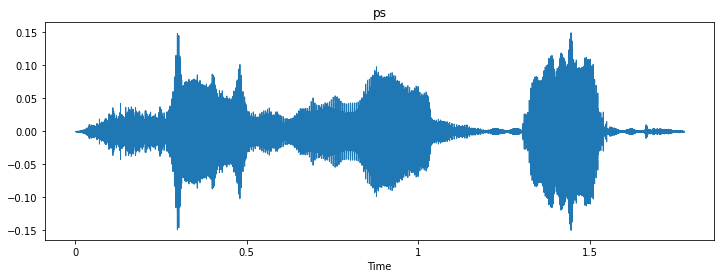

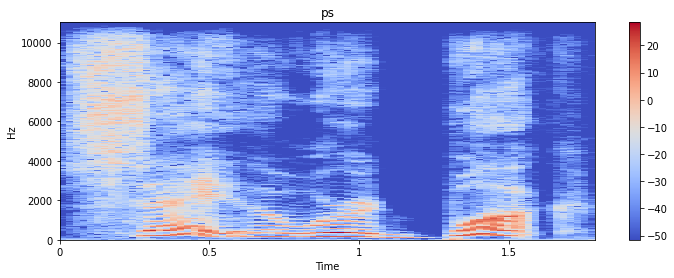

In [ ]:
EType = 'ps'
getInfo(EType)
Audio(getPath(EType))

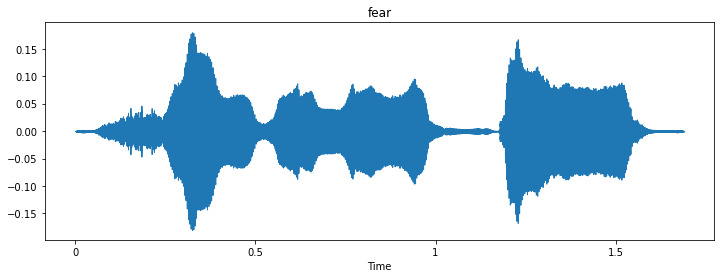

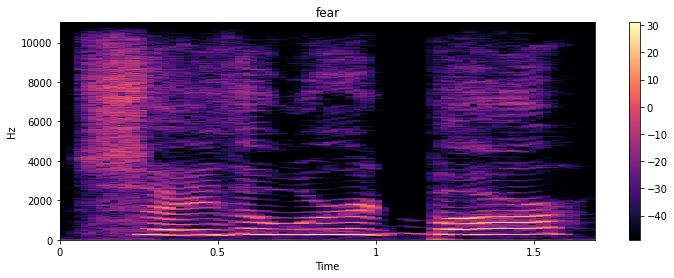

In [ ]:
EType = 'fear'
getInfo(EType)
Audio(getPath(EType))

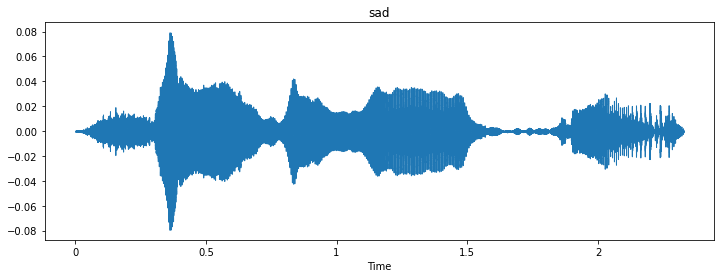

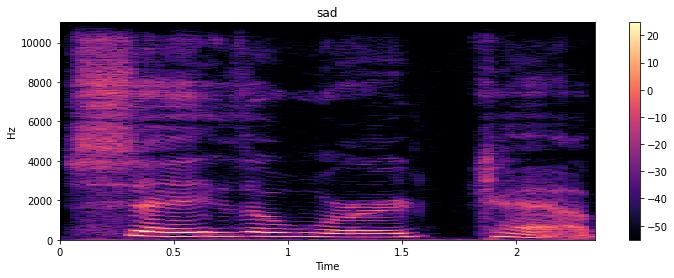

In [ ]:
EType = 'sad'
getInfo(EType)
Audio(getPath(EType))

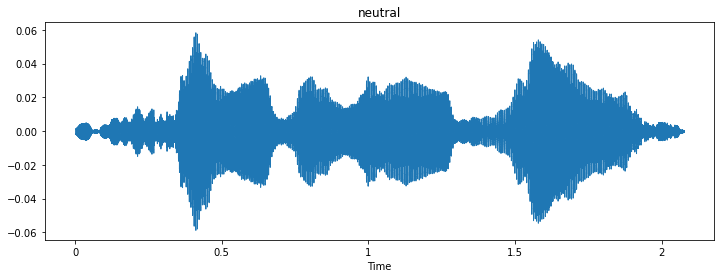

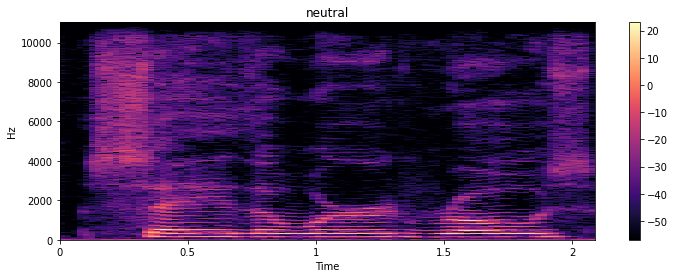

In [ ]:
EType = 'neutral'
getInfo(EType)
Audio(getPath(EType))

# Data Augmentation

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return lr.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return lr.effects.pitch_shift(data, sampling_rate, pitch_factor)

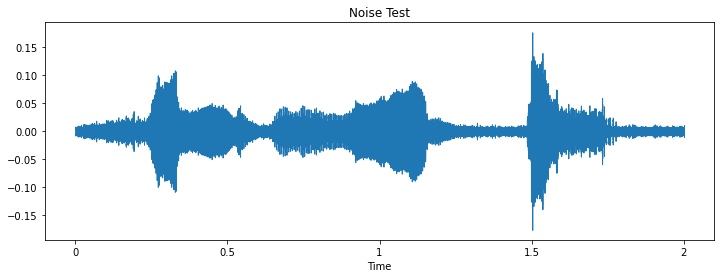

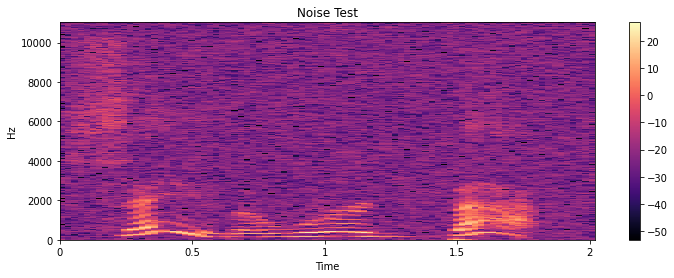

In [ ]:
path = getPath('happy')
data, sr = lr.load(path)
x = noise(data)
waveplot(x, sr, 'Noise Test')
spectograph(x, sr, 'Noise Test')
Audio(x, rate=sr)

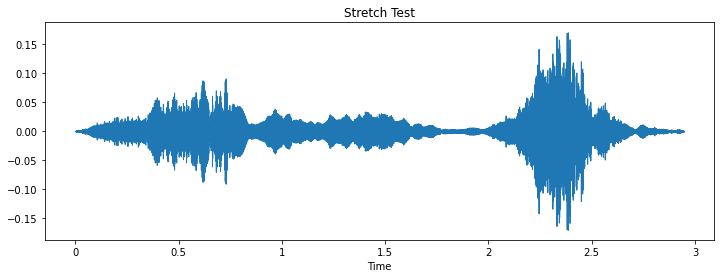

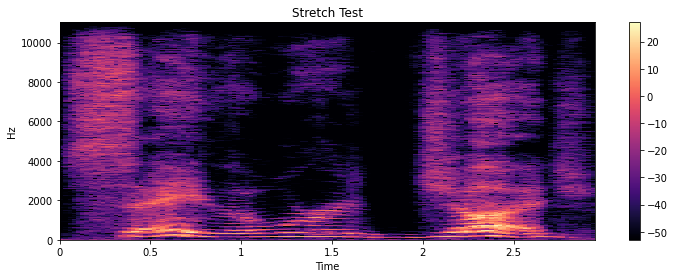

In [ ]:
path = getPath('disgust')
data, sr = lr.load(path)
x = stretch(data)
waveplot(x, sr, 'Stretch Test')
spectograph(x, sr, 'Stretch Test')
Audio(x, rate=sr)

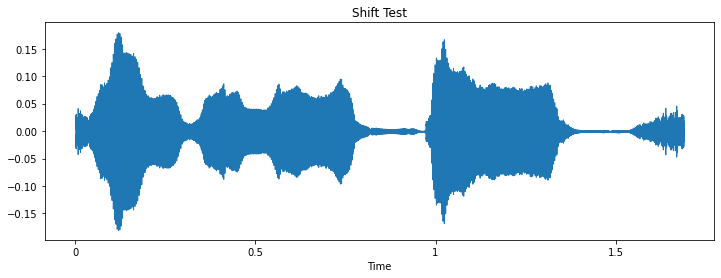

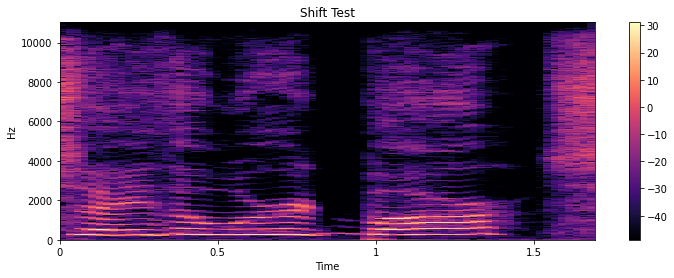

In [ ]:
path = getPath('fear')
data, sr = lr.load(path)
x = shift(data)
waveplot(x, sr, 'Shift Test')
spectograph(x, sr, 'Shift Test')
Audio(x, rate=sr)

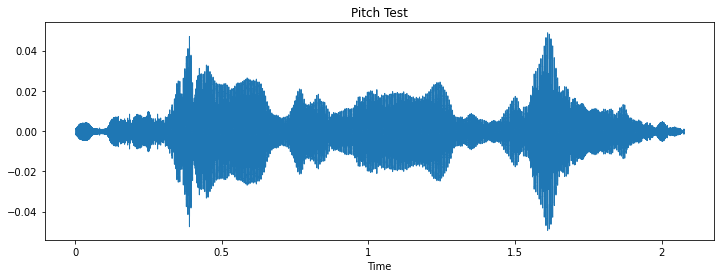

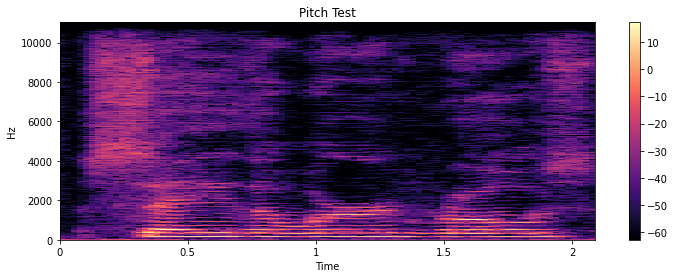

In [ ]:
path = getPath('neutral')
data, sr = lr.load(path)
x = pitch(data, sr)
waveplot(x, sr, 'Pitch Test')
spectograph(x, sr, 'Pitch Test')
Audio(x, rate=sr)

In [ ]:
## Shuffling
# d = d.sample(frac=1).reset_index(drop=True)
# d.head()

# Feature Extraction

In [ ]:
def extract_features(data, sample_rate):
    result = np.array([])

    # ZCR
    # zcr = np.mean(lr.feature.zero_crossing_rate(y=data).T, axis=0)
    # result=np.hstack((result, zcr)) 

    # Chroma_stft
    # stft = np.abs(lr.stft(data))
    # chroma_stft = np.mean(lr.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    # result = np.hstack((result, chroma_stft)) 

    # MFCC
    mfcc = np.mean(lr.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40).T, axis=0)
    result = np.hstack((result, mfcc)) 

    # Root Mean Square Value
    # rms = np.mean(lr.feature.rms(y=data).T, axis=0)
    # result = np.hstack((result, rms)) 

    # MelSpectogram
    # mel = np.mean(lr.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    # result = np.hstack((result, mel))
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = lr.load(path, sr=8025) # Downsampling to 8000 Hz
    
    # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [ ]:
from tqdm import tqdm
def augment(x, y, n):
    X, Y = [], []
    for path, emotion in tqdm(zip(x, y)):
        feature = get_features(path)
        for ele in feature:
            X.append(ele)
            Y.append(emotion)
    X_n = np.array(X)
    Y_n = np.array(Y)
    return X_n, Y_n

In [ ]:
def featToDF(X, Y):
    Features = pd.DataFrame(X)
    Features['labels'] = Y
    X = Features.iloc[: ,:-1].values
    Y = Features['labels'].values
    return X, Y

# Input split

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
encoder = OneHotEncoder()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(d['sound'], d['emotion'], test_size= 0.2, random_state=0, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

In [ ]:
x_train, y_train = augment(x_train, y_train, 'train')
x_val, y_val = augment(x_val, y_val, 'val')
x_test, y_test = augment(x_test, y_test, 'test')

In [ ]:
# x_train = np.load('/content/drive/MyDrive/Colab Notebooks/X_n_train.npy')
# y_train = np.load('/content/drive/MyDrive/Colab Notebooks/Y_n_train.npy')
# x_val = np.load('/content/drive/MyDrive/Colab Notebooks/X_n_val.npy')
# y_val = np.load('/content/drive/MyDrive/Colab Notebooks/Y_n_val.npy')
# x_test = np.load('/content/drive/MyDrive/Colab Notebooks/X_n_test.npy')
# y_test = np.load('/content/drive/MyDrive/Colab Notebooks/Y_n_test.npy')

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((5376, 40), (5376,), (1680, 40), (1680,), (1344, 40), (1344,))

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((5376, 40), (5376,), (1680, 40), (1680,), (1344, 40), (1344,))

In [ ]:
y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_val = encoder.fit_transform(np.array(y_val).reshape(-1,1)).toarray()
y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_val = np.expand_dims(x_val, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((5376, 40, 1), (5376, 7), (1680, 40, 1), (1680, 7), (1344, 40, 1), (1344, 7))

# Models

In [2]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten, Activation, BatchNormalization
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# LTSM

In [ ]:
def gpu_lstm():
    model = Sequential([
        CuDNNLSTM(123, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])),            
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(y_train.shape[1], activation='softmax')                
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def lstm():
    model = Sequential([
        LSTM(123, return_sequences=False, input_shape=x_train.shape[1:3]),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = gpu_lstm()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_5 (CuDNNLSTM)    (None, 123)               61992     
                                                                 
 dense_15 (Dense)            (None, 64)                7936      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 7)                 231       
                                                                 
Total params: 72,239
Trainable params: 72,239
Non-trai

### Training

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/models/mfcc_lstm.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size=512, shuffle=True, callbacks=[es, mc])

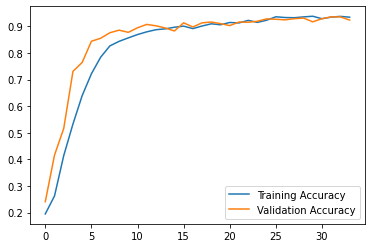

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


sb.lineplot(x=range(len(acc)), y=acc, label='Training Accuracy')
sb.lineplot(x=range(len(val_acc)), y=val_acc, label='Validation Accuracy')

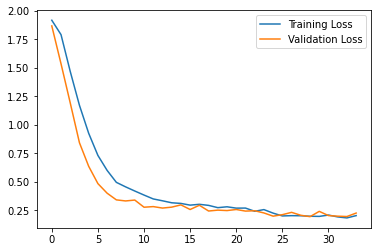

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

sb.lineplot(x=range(len(loss)), y=loss, label='Training Loss')
sb.lineplot(x=range(len(val_loss)), y=val_loss, label='Validation Loss')

### Testing

In [ ]:
saved_model = load_model('/content/drive/MyDrive/Colab Notebooks/models/mfcc_lstm.h5')
train_loss, train_acc = saved_model.evaluate(x_train, y_train, verbose=1)
test_loss, test_acc = saved_model.evaluate(x_test, y_test, verbose=1)

53/53 [==============================] - 1s 7ms/step - loss: 0.1763 - accuracy: 0.9399


Text(0.5, 1.0, 'Training and Testing Accuracy')

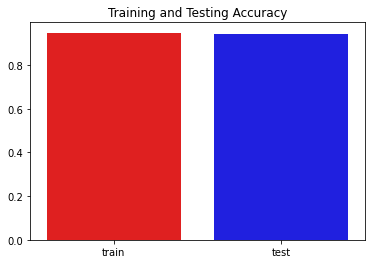

In [ ]:
sb.barplot(x=['train', 'test'], y=[train_acc, test_acc], palette=['red', 'blue']).set_title('Training and Testing Accuracy')

Text(0.5, 1.0, 'Training and Testing Loss')

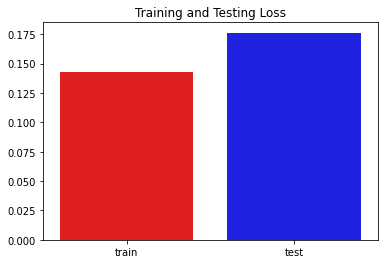

In [ ]:
sb.barplot(x=['train', 'test'], y=[train_loss, test_loss], palette=['red', 'blue']).set_title('Training and Testing Loss')

In [ ]:
pred_test = saved_model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test_i = encoder.inverse_transform(y_test)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_i.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,ps,ps
1,ps,ps
2,ps,ps
3,fear,fear
4,fear,fear
5,fear,fear
6,neutral,neutral
7,neutral,neutral
8,neutral,neutral
9,happy,happy


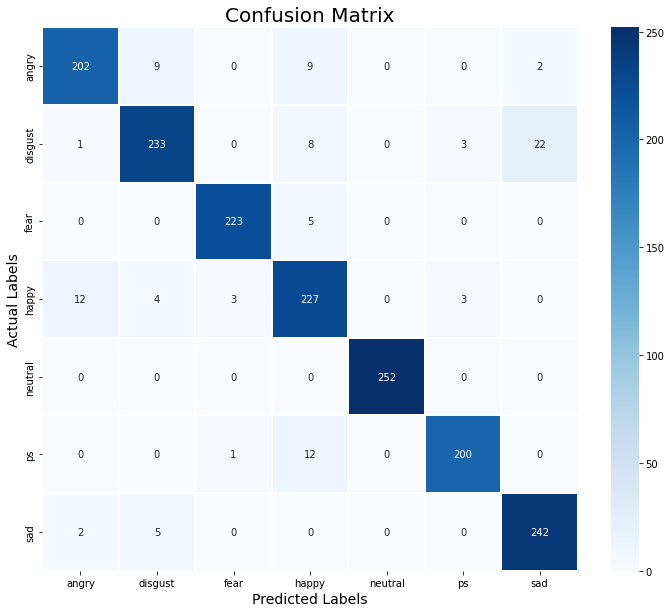

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_i, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sb.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

#### KFOLD

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
skf.get_n_splits(d['sound'], d['emotion'])

5

In [ ]:
lstm_acc = []
lstm_loss = []

def training(x_train, y_train, x_test, y_test, x_val, y_val):
    model = gpu_lstm()
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    # mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/models/mfcc_lstm.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size=512, shuffle=True, callbacks=[es, mc])
    a, b = model.evaluate(x_test, y_test)
    lstm_acc.append(b)
    lstm_loss.append(a)


In [ ]:
for train_index, test_index in skf.split(d['sound'], d['emotion']):
    x_train, x_test = d['sound'][train_index], d['sound'][test_index]
    y_train, y_test = d['emotion'][train_index], d['emotion'][test_index]
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2, random_state=0, shuffle=True)


    x_train, y_train = augment(x_train, y_train, 'train')
    x_test, y_test = augment(x_test, y_test, 'test')
    x_val, y_val = augment(x_val, y_val, 'val')

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    x_val = scaler.transform(x_val)

    y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
    y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()
    y_val = encoder.fit_transform(np.array(y_val).reshape(-1,1)).toarray()

    x_train = np.expand_dims(x_train, axis=2)
    x_test = np.expand_dims(x_test, axis=2)
    x_val = np.expand_dims(x_val, axis=2)

    training(x_train, y_train, x_test, y_test, x_val, y_val)


In [ ]:
lstm_acc

[0.9119047522544861,
 0.9160714149475098,
 0.9345238208770752,
 0.9238095283508301,
 0.9428571462631226]

In [ ]:
lstm_loss

[0.24989697337150574,
 0.25917375087738037,
 0.18837736546993256,
 0.2149880975484848,
 0.17145408689975739]

In [ ]:
np.average(lstm_acc)

0.9258333325386048

In [ ]:
np.average(lstm_loss)

0.21677805483341217

# CNN

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/models/mfcc_cnn.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
def cnn1():
    model = Sequential()
    model.add(Conv1D(256, 8, padding='same', input_shape=(x_train.shape[1],1)))  # No. of Columns
    model.add(Activation('relu'))
    model.add(Conv1D(256, 8, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(64, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(y_train.shape[1])) # Number of emotions
    model.add(Activation('softmax'))
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
    return model

def cnn2():
    model=Sequential()
    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

    model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

    model.add(Flatten())
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(units=y_train.shape[1], activation='softmax'))
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
    return model

In [ ]:
modelCnn = cnn2()

modelCnn.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 256)           1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 5, 128)         

In [ ]:
history2 = modelCnn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size=512, shuffle=True, callbacks=[es, mc])

Epoch 1/200
11/11 [==============================] - ETA: 0s - loss: 1.8108 - accuracy: 0.2554
Epoch 1: val_loss improved from inf to 1.39007, saving model to /content/drive/MyDrive/Colab Notebooks/models/mfcc_cnn.h5
11/11 [==============================] - 9s 188ms/step - loss: 1.8108 - accuracy: 0.2554 - val_loss: 1.3901 - val_accuracy: 0.4985
Epoch 2/200
10/11 [==========================>...] - ETA: 0s - loss: 1.2573 - accuracy: 0.5131
Epoch 2: val_loss improved from 1.39007 to 0.76008, saving model to /content/drive/MyDrive/Colab Notebooks/models/mfcc_cnn.h5
11/11 [==============================] - 1s 63ms/step - loss: 1.2458 - accuracy: 0.5177 - val_loss: 0.7601 - val_accuracy: 0.7619
Epoch 3/200
11/11 [==============================] - ETA: 0s - loss: 0.8393 - accuracy: 0.6877
Epoch 3: val_loss improved from 0.76008 to 0.49473, saving model to /content/drive/MyDrive/Colab Notebooks/models/mfcc_cnn.h5
11/11 [==============================] - 1s 57ms/step - loss: 0.8393 - accuracy:

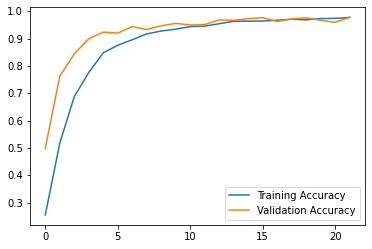

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

sb.lineplot(x=range(len(acc)), y=acc, label='Training Accuracy')
sb.lineplot(x=range(len(val_acc)), y=val_acc, label='Validation Accuracy')

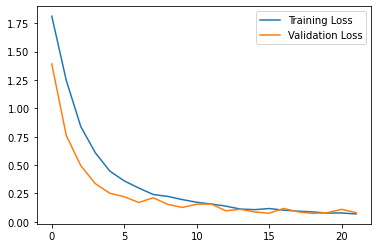

In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

sb.lineplot(x=range(len(loss)), y=loss, label='Training Loss')
sb.lineplot(x=range(len(val_loss)), y=val_loss, label='Validation Loss')

53/53 [==============================] - 1s 7ms/step - loss: 0.0687 - accuracy: 0.9774


Text(0.5, 1.0, 'Training and Testing Accuracy')

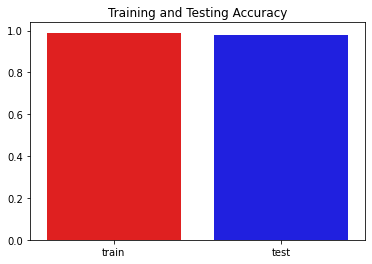

In [ ]:
saved_model = load_model('/content/drive/MyDrive/Colab Notebooks/models/mfcc_cnn.h5')
train_loss, train_acc = saved_model.evaluate(x_train, y_train, verbose=1)
test_loss, test_acc = saved_model.evaluate(x_test, y_test, verbose=1)
sb.barplot(x=['train', 'test'], y=[train_acc, test_acc], palette=['red', 'blue']).set_title('Training and Testing Accuracy')

In [ ]:
pred_test = saved_model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test_i = encoder.inverse_transform(y_test)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_i.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,fear,fear
1,fear,fear
2,fear,fear
3,fear,fear
4,fear,fear
5,fear,fear
6,fear,fear
7,fear,fear
8,fear,fear
9,fear,fear


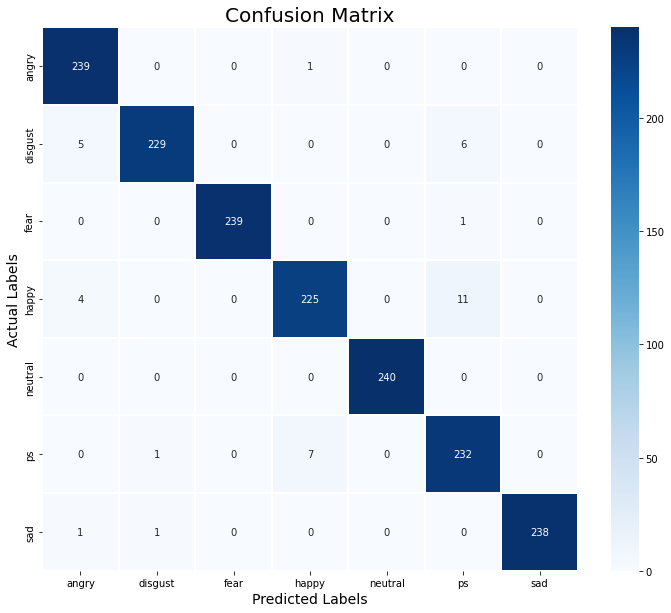

In [ ]:
cm = confusion_matrix(y_test_i, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sb.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

#### KFOLD

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
skf.get_n_splits(d['sound'], d['emotion'])

5

In [ ]:
cnn_acc = []
cnn_loss = []

def training(x_train, y_train, x_test, y_test, x_val, y_val):
    model = cnn2()
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    # mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/models/mfcc_lstm.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size=512, shuffle=True, callbacks=[es, mc])
    a, b = model.evaluate(x_test, y_test)
    cnn_acc.append(b)
    cnn_loss.append(a)


In [ ]:
for train_index, test_index in skf.split(d['sound'], d['emotion']):
    x_train, x_test = d['sound'][train_index], d['sound'][test_index]
    y_train, y_test = d['emotion'][train_index], d['emotion'][test_index]
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2, random_state=0, shuffle=True)


    x_train, y_train = augment(x_train, y_train, 'train')
    x_test, y_test = augment(x_test, y_test, 'test')
    x_val, y_val = augment(x_val, y_val, 'val')

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    x_val = scaler.transform(x_val)

    y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
    y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()
    y_val = encoder.fit_transform(np.array(y_val).reshape(-1,1)).toarray()

    x_train = np.expand_dims(x_train, axis=2)
    x_test = np.expand_dims(x_test, axis=2)
    x_val = np.expand_dims(x_val, axis=2)

    training(x_train, y_train, x_test, y_test, x_val, y_val)


1792it [06:47,  4.39it/s]
560it [02:07,  4.39it/s]
448it [01:41,  4.40it/s]


Epoch 1/200
10/11 [==========================>...] - ETA: 0s - loss: 1.7655 - accuracy: 0.2816
Epoch 1: val_loss did not improve from 0.07426
11/11 [==============================] - 2s 94ms/step - loss: 1.7536 - accuracy: 0.2872 - val_loss: 1.2663 - val_accuracy: 0.6473
Epoch 2/200
11/11 [==============================] - ETA: 0s - loss: 1.1678 - accuracy: 0.5820
Epoch 2: val_loss did not improve from 0.07426
11/11 [==============================] - 1s 52ms/step - loss: 1.1678 - accuracy: 0.5820 - val_loss: 0.6631 - val_accuracy: 0.8140
Epoch 3/200
11/11 [==============================] - ETA: 0s - loss: 0.7393 - accuracy: 0.7543
Epoch 3: val_loss did not improve from 0.07426
11/11 [==============================] - 1s 51ms/step - loss: 0.7393 - accuracy: 0.7543 - val_loss: 0.4317 - val_accuracy: 0.8646
Epoch 4/200
11/11 [==============================] - ETA: 0s - loss: 0.5227 - accuracy: 0.8136
Epoch 4: val_loss did not improve from 0.07426
11/11 [==============================] - 1

1736it [06:30,  4.74it/s]

In [ ]:
cnn_acc

In [ ]:
cnn_loss

In [ ]:
np.average(cnn_acc)

In [ ]:
np.average(cnn_loss)